In [1]:
#%pip install biolearn
#%pip install scikit-learn
#%pip install matplotlib
#%pip install xgboost

In [1]:
from biolearn.data_library import DataLibrary

In [2]:
import pandas as pd

#Download the data file for the warmup challenge linked here https://www.synapse.org/#!Synapse:syn52966292/wiki/625231
DOWNLOADED_DATA_FILE_PATH="warmup_challenge_methylation/challenge_data.csv"
challenge_data = pd.read_csv(DOWNLOADED_DATA_FILE_PATH, index_col=0)
challenge_data

from biolearn.data_library import DataLibrary
data = DataLibrary().get("GSE40279").load()
data.metadata


,age,sex,ethnicity,tissue
id,,,,
GSM989827,67.0,1,Caucasian - European,whole blood
GSM989828,89.0,1,Caucasian - European,whole blood
GSM989829,66.0,1,Caucasian - European,whole blood
GSM989830,64.0,1,Caucasian - European,whole blood
GSM989831,62.0,1,Caucasian - European,whole blood
...,...,...,...,...
GSM990623,78.0,1,Caucasian - European,whole blood
GSM990624,71.0,2,Caucasian - European,whole blood
GSM990625,68.0,2,Caucasian - European,whole blood


In [17]:
data.dnam.transpose()

id,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.945770F,ch.9.96055087R,ch.9.97139671F,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98959675F,ch.9.98989607R,ch.9.991104F
GSM989827,0.464197,0.941091,0.911182,0.132014,0.717861,0.686521,0.805003,0.228244,0.338483,0.016508,...,0.022659,0.109918,0.061222,0.034284,0.133692,0.042808,0.052589,0.035624,0.028066,0.043850
GSM989828,0.454883,0.939033,0.596455,0.206917,0.723935,0.619084,0.814672,0.310879,0.418998,0.005747,...,0.005095,0.076996,0.052640,0.027978,0.125270,0.036811,0.053343,0.075618,0.017428,0.032950
GSM989829,0.485764,0.918802,0.870333,0.162861,0.719196,0.635678,0.824336,0.263215,0.424736,0.012197,...,0.021444,0.070694,0.058888,0.032643,0.139105,0.042844,0.045973,0.126421,0.021752,0.022375
GSM989830,0.480785,0.929908,0.889689,0.197780,0.704061,0.610864,0.811152,0.316761,0.398772,0.019945,...,0.028587,0.094749,0.056279,0.036997,0.140601,0.042258,0.048733,0.084051,0.027504,0.053007
GSM989831,0.501220,0.934548,0.890450,0.148437,0.754913,0.651262,0.808628,0.338289,0.366965,0.000000,...,0.018626,0.110543,0.057568,0.036746,0.129993,0.039613,0.039254,0.165874,0.020889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.527496,0.958173,0.922034,0.223068,0.778959,0.709248,0.825768,0.354296,0.396241,0.001778,...,0.016319,0.079741,0.072076,0.052052,0.159212,0.049571,0.033060,0.093414,0.013654,0.014088
GSM990624,0.588331,0.982450,0.855145,0.162180,0.796868,0.535832,0.806713,0.295598,0.301319,0.006685,...,0.023837,0.117762,0.058466,0.037199,0.133899,0.055904,0.062442,0.101100,0.014193,0.000000
GSM990625,0.362994,0.954392,0.927184,0.196430,0.713020,0.664184,0.804045,0.395724,0.445179,0.003822,...,0.012054,0.079249,0.053499,0.050002,0.149589,0.048526,0.041087,0.049857,0.016840,0.041415
GSM990626,0.499145,0.931690,0.900938,0.167477,0.730215,0.665792,0.831365,0.338117,0.383953,0.000000,...,0.009878,0.090751,0.060335,0.040898,0.168269,0.056429,0.047835,0.028896,0.025346,0.052959


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract data from your 'data' object
X = data.dnam.transpose().values  # Transpose to have samples as rows and cpg sites as columns
y = data.metadata['age'].values

# Parameters for bootstrap and feature selection
n_bootstrap = 20
threshold = 0.05

# Store count of times each CpG site is deemed significant
cpg_counts = np.zeros(X.shape[1])

# Begin bootstrap iterations
for _ in range(n_bootstrap):
    # Sample with replacement from X, y
    sample_idx = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
    X_sample = X[sample_idx]
    y_sample = y[sample_idx]

    # Train model
    model = LinearRegression()
    model.fit(X_sample, y_sample)

    # Identify significant CpG sites (based on magnitude of coefficients)
    significant_cpgs = np.where(np.abs(model.coef_) > threshold)[0]
    cpg_counts[significant_cpgs] += 1

# Determine stable CpG sites
stable_cpg_sites = np.where(cpg_counts > n_bootstrap * 0.6)[0]
stable_cpg_names = data.dnam.index[stable_cpg_sites].tolist()

print(f"Stable CpG sites (associated with age in more than 60% of bootstrap samples): {stable_cpg_sites}")

Stable CpG sites (associated with age in more than 60% of bootstrap samples): [     0      1      2 ... 468089 468091 468607]


In [4]:
#Seperate data into training and test sets
from sklearn.model_selection import train_test_split

df = data.dnam.transpose()
df['age'] = data.metadata['age']
top_sites_df = df[stable_cpg_names]

X = top_sites_df
y = df['age']

X= np.array(X)
y=np.array(y)
display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

array([[0.4641974, 0.9410907, 0.9111821, ..., 0.491017 , 0.2174585,
        0.1511911],
       [0.4548833, 0.9390332, 0.5964548, ..., 0.3004176, 0.2474383,
        0.1241939],
       [0.4857639, 0.918802 , 0.8703333, ..., 0.3578161, 0.3211561,
        0.2090741],
       ...,
       [0.3629945, 0.9543923, 0.9271835, ..., 0.3731503, 0.2950113,
        0.1611126],
       [0.499145 , 0.9316905, 0.9009384, ..., 0.4535084, 0.2351374,
        0.2071418],
       [0.4586001, 0.9747313, 0.8298687, ..., 0.1693436, 0.3692338,
        0.2816311]])

array([ 67.,  89.,  66.,  64.,  62.,  87.,  73.,  75.,  73.,  83.,  82.,
        48.,  77.,  54.,  63.,  71.,  68.,  80.,  92.,  60.,  79.,  68.,
        93.,  84.,  74.,  74.,  76.,  56.,  72.,  75.,  79.,  73.,  82.,
        74.,  79.,  54., 101.,  79.,  84.,  85.,  87.,  74.,  77.,  73.,
        87.,  85.,  88.,  66.,  78.,  53.,  76.,  67.,  73.,  54.,  73.,
        96.,  57.,  76.,  47.,  54.,  73.,  84.,  62.,  89.,  68.,  62.,
        79.,  72.,  69.,  55.,  73.,  79.,  72.,  89.,  79.,  85.,  68.,
        89.,  73.,  63.,  78.,  65.,  65.,  89.,  85.,  66.,  76.,  74.,
        84.,  71.,  49.,  69.,  63.,  66.,  85.,  76.,  84.,  59.,  70.,
        65.,  68.,  84.,  75.,  51.,  63.,  69.,  78.,  78.,  52.,  49.,
        53.,  59.,  62.,  46.,  68.,  74.,  59.,  76.,  54.,  59.,  48.,
        45.,  62.,  63.,  80.,  60.,  71.,  67.,  50.,  86.,  70.,  54.,
        69.,  76.,  58.,  58.,  64.,  73.,  49.,  56.,  75.,  48.,  81.,
        72.,  61.,  50.,  69.,  65.,  47.,  43.,  5

(524, 1339)

(524,)

(132, 1339)

(132,)

In [7]:
#Train a model using elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=10000)
# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 652.9547799991551


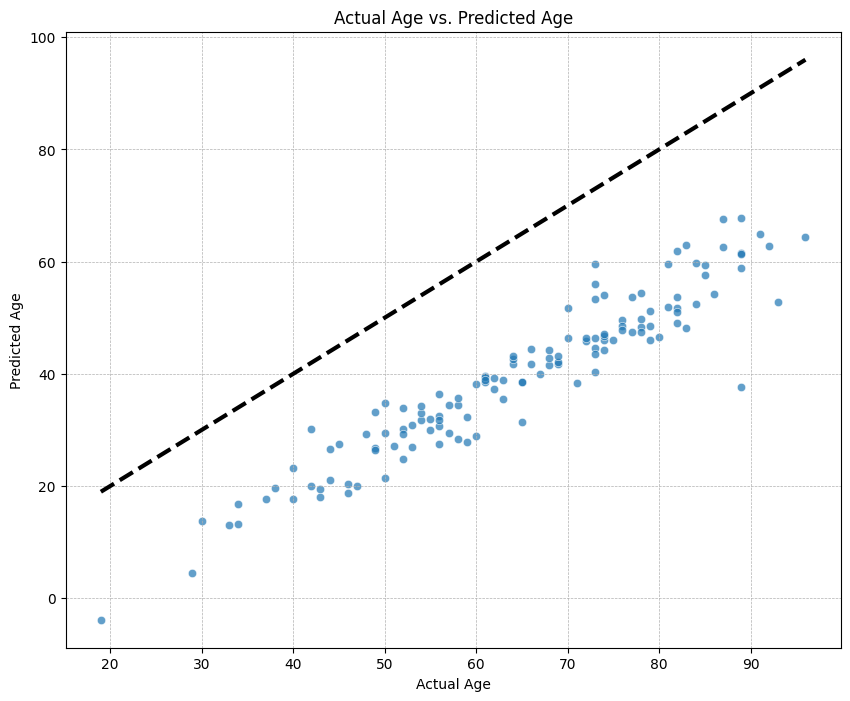

Mean Squared Error (MSE): 652.9548
Mean Absolute Error (MAE): 24.9991


In [8]:
#Plot the results to see how good our model is
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)  # y=x line for reference
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [9]:
display(X_train)
display(X_train.shape)
x_train=np.array(X_train)
display(x_train)
display(x_train.shape)


Y_train=np.array(y_train)
display(Y_train)
display(Y_train.shape)
X_features=list(X_train)

display(X_features)

#feature_names=

array([[0.4422767, 0.9303187, 0.8763047, ..., 0.4768002, 0.389242 ,
        0.2192842],
       [0.4847671, 0.9634891, 0.916423 , ..., 0.4070774, 0.2884322,
        0.2571262],
       [0.8854644, 0.9690601, 0.8805442, ..., 0.5359172, 0.7475795,
        0.4150521],
       ...,
       [0.478548 , 0.919602 , 0.8384041, ..., 0.3808263, 0.3320422,
        0.3471432],
       [0.4972598, 0.9560931, 0.8982148, ..., 0.3791698, 0.373256 ,
        0.1923768],
       [0.3789643, 0.939527 , 0.8916494, ..., 0.2751304, 0.2924761,
        0.1213912]])

(524, 1339)

array([[0.4422767, 0.9303187, 0.8763047, ..., 0.4768002, 0.389242 ,
        0.2192842],
       [0.4847671, 0.9634891, 0.916423 , ..., 0.4070774, 0.2884322,
        0.2571262],
       [0.8854644, 0.9690601, 0.8805442, ..., 0.5359172, 0.7475795,
        0.4150521],
       ...,
       [0.478548 , 0.919602 , 0.8384041, ..., 0.3808263, 0.3320422,
        0.3471432],
       [0.4972598, 0.9560931, 0.8982148, ..., 0.3791698, 0.373256 ,
        0.1923768],
       [0.3789643, 0.939527 , 0.8916494, ..., 0.2751304, 0.2924761,
        0.1213912]])

(524, 1339)

array([59, 51, 65, 50, 23, 25, 35, 26, 56, 45, 38, 64, 40, 38, 57, 36, 31,
       60, 35, 63, 41, 20, 38, 43, 46, 52, 48, 50, 46, 56, 39, 48, 40, 17,
       52, 50, 37, 48, 52, 64, 22, 29, 13, 54, 23, 37,  5, 28, 43, 44, 22,
       43, 42, 46, 16, 64,  4, 39, 30, 38, 59, 33, 27, 39, 35, 35, 32, 30,
       48, 17, 29, 55, 51, 58, 67, 45, 34, 41, 27, 60, 32, 53, 43, 57,  8,
       41, 26, 39, 26, 44, 47, 31,  5, 59, 45, 11, 60, 33, 38, 39, 44, 33,
       34,  1, 49, 46, 64, 39, 61, 44, 59,  5, 51, 40, 24, 49, 51, 42, 66,
       30, 25, 19, 31, 41, 39, 34, 60, 34, 32, 32, 36, 47, 48, 62, 40, 44,
       63, 21, 53, 48,  9, 53, 33, 40, 52, 57, 42, 57, 30, 64, 34, 18, 55,
       43, 51, 42, 25, 27, 39, 41, 60, 56, 23, 25, 35, 22, 20, 52, 49, 22,
       10, 55, 36, 23, 24, 38, 39, 40, 46, 30, 36, 21, 26, 55, 51, 40, 56,
       26, 55, 42, 30, 46, 23, 33, 52, 41, 41, 39, 60, 45, 38, 43, 36, 49,
       20, 62, 60, 34, 47, 27, 43, 53, 58, 60, 39, 34, 32, 23, 40, 33, 30,
       35, 50, 51, 32, 32

(524,)

[array([0.4422767, 0.9303187, 0.8763047, ..., 0.4768002, 0.389242 ,
        0.2192842]),
 array([0.4847671, 0.9634891, 0.916423 , ..., 0.4070774, 0.2884322,
        0.2571262]),
 array([0.8854644, 0.9690601, 0.8805442, ..., 0.5359172, 0.7475795,
        0.4150521]),
 array([0.5343571, 0.9332625, 0.8843227, ..., 0.447704 , 0.2803193,
        0.2163306]),
 array([0.4900944, 0.9460071, 0.8354741, ..., 0.3709038, 0.1983736,
        0.1515196]),
 array([0.4506961, 0.9414961, 0.9204007, ..., 0.4071878, 0.3290099,
        0.2287802]),
 array([0.5208851, 0.9387336, 0.8739857, ..., 0.4885365, 0.3995539,
        0.251153 ]),
 array([0.4943147, 0.9015747, 0.9508293, ..., 0.4983001, 0.3784445,
        0.2444879]),
 array([0.5673167, 0.9273041, 0.8831527, ..., 0.3111383, 0.3715611,
        0.3396802]),
 array([0.5051925, 0.9630517, 0.9465466, ..., 0.23497  , 0.2862107,
        0.1721736]),
 array([0.490781 , 0.943565 , 0.8690951, ..., 0.4966087, 0.3914997,
        0.2573597]),
 array([0.5736301, 0.

c:\Users\25258\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators", "slient" } are not used.

  warnings.warn(smsg, UserWarning)


mse: 26.254908175681962


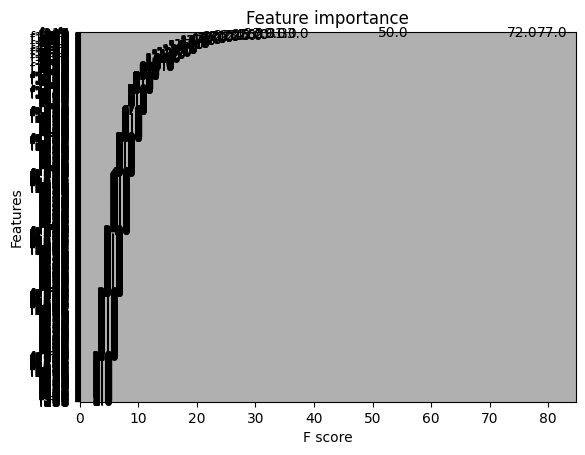

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
import xgboost as xgb



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0,
    'max_depth': 20,
    'lambda': 0.5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'slient': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
    'learning_rate': 0.1,
    'alpha': 0,
    'n_estimators': 10
}

dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 300
plst = list(params.items())
model = xgb.train(plst,dtrain,num_rounds)

dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
print('mse:', mean_squared_error(y_test, ans))

plot_importance(model)
plt.show()

Feature: f5, Importance: 77.0
Feature: f211, Importance: 72.0
Feature: f846, Importance: 50.0
Feature: f184, Importance: 33.0
Feature: f0, Importance: 31.0
Feature: f3, Importance: 29.0
Feature: f4, Importance: 27.0
Feature: f2, Importance: 26.0
Feature: f827, Importance: 26.0
Feature: f6, Importance: 25.0
Feature: f9, Importance: 25.0
Feature: f738, Importance: 24.0
Feature: f1198, Importance: 23.0
Feature: f14, Importance: 22.0
Feature: f55, Importance: 21.0
Feature: f548, Importance: 21.0
Feature: f1, Importance: 20.0
Feature: f15, Importance: 20.0
Feature: f22, Importance: 20.0
Feature: f35, Importance: 20.0
Feature: f19, Importance: 19.0
Feature: f21, Importance: 19.0
Feature: f1179, Importance: 19.0
Feature: f34, Importance: 18.0
Feature: f381, Importance: 18.0
Feature: f444, Importance: 18.0
Feature: f830, Importance: 18.0
Feature: f42, Importance: 17.0
Feature: f371, Importance: 17.0
Feature: f657, Importance: 17.0
Feature: f12, Importance: 16.0
Feature: f13, Importance: 16.0
F

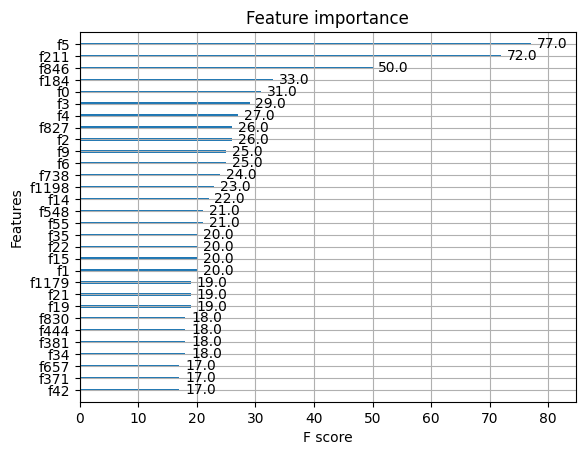

In [41]:
import xgboost as xgb
import matplotlib.pyplot as plt

feature_importance = model.get_score(importance_type='weight')

# Convert feature importance to a sorted list of tuples
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = sorted_feature_importance[:50]

# If you want to display the top 10 features
for feature, importance in top_10_features:
    print(f"Feature: {feature}, Importance: {importance}")

# Optionally, you can plot these top 10 features
xgb.plot_importance(model, max_num_features=30)
plt.show()
